<h1 style="text-align: center;"><strong>Coleta e Organiza&ccedil;&atilde;o de Dados</strong></h1>
<p style="text-align: center;">Defini&ccedil;&atilde;o, Coleta, Organiza&ccedil;&atilde;o, Visualiza&ccedil;&atilde;o e An&aacute;lise<br />dos Dados.</p>
<p style="text-align: justify;"><br></p>
<p style="text-align: justify;"></p>

<h1 style="text-align: left;"><strong>1. Importanto Bibliotecas</strong></h1>

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats
from scipy.stats import binom

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

from chembl_webresource_client.new_client import new_client

# Configurando exibição de dados Pandas DataFrame
# Setando max_columns para None, indicando que será exibido todas as colunas
pd.set_option('display.max_columns', None)

<h1 style="text-align: left;"><strong>2. Dados</strong></h1>

<h2 style="text-align: left;"><strong>2.1. Alvos (targets)</strong></h2>
<br><p style="text-align: justify;">Listando especificamente as prote&iacute;nas da esp&eacute;cie <em>Homo sapiens</em> que s&atilde;o alvos de canabinoides (especificando, proteínas simples) . No caso, o retorno ser&aacute;:</p>
<ul>
<li style="text-align: justify;">Receptor canabinoide CB1: localizado principalmente no c&eacute;rebro, em &aacute;reas como hipocampo, hipot&aacute;lamo, vias demarmin&eacute;gicas e na subst&acirc;ncia negra.</li>
<li style="text-align: justify;">Recpetor canabinoide CB2: localizado no ba&ccedil;o, tonsilas, medula &oacute;ssea e c&eacute;lulas do sangue.</li>
</ul>

In [100]:
# Buscando alvos
alvo = new_client.target
consulta_alvo = alvo.search('cannabinoid').filter(organism = 'Homo sapiens').filter(target_type = 'SINGLE PROTEIN')
df_alvos = pd.DataFrame.from_dict(consulta_alvo)
df_alvos

# Salvando os dados
df_alvos.to_csv('alvos_de_canabinoides.csv', index=False, float_format='%.6f', encoding='utf-8')

<h2 style="text-align: left;"><strong>2.2. Buscando Mol&eacute;culas (activities)</strong></h2>
<p>&nbsp;</p>
<p style="text-align: justify;">Agora, vamos buscar as mol&eacute;culas que tem atividade sobre as prote&iacute;nas CCB1 e CB2 do tipo IC50 (compostos que apresentam valores que conseguem inibir at&eacute; 50% da atividade biol&oacute;gica.).&nbsp;</p>
<p style="text-align: justify;">Quanto menor o valor (standard_value), mais potente o medicamento.</p>

In [101]:
atividade = new_client.activity
resultado = atividade.filter(target_chembl_id__in	= ['CHEMBL218', 'CHEMBL253']).filter(standard_type='IC50')
df_atividades = pd.DataFrame.from_dict(resultado)

# Salvando os atividades
df_atividades.to_csv('atividades.csv', index=False, float_format='%.6f', encoding='utf-8')

In [102]:
# exbindo primeiras linhas
df_atividades.head(4)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,949646,[],CHEMBL663458,Binding affinity against cannabinoid receptor 1,B,None,None,BAO_0000190,BAO_0000357,single protein format,N#Cc1ccc(CCOC(=O)NC2CCN(CCCC(c3ccc(F)cc3)c3ccc...,None,None,CHEMBL1134625,J Med Chem,2001.0,"{'bei': '10.08', 'le': '0.19', 'lle': '-0.96',...",CHEMBL116463,None,CHEMBL116463,5.21,0,http://www.openphacts.org/units/Nanomolar,216610,=,1,1,=,None,IC50,nM,None,6090.0,CHEMBL218,Homo sapiens,Cannabinoid CB1 receptor,9606,None,None,IC50,nM,UO_0000065,None,6090.0
1,None,1192012,[],CHEMBL663456,Ability to displace [3H]-SR- 141716A binding t...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCCCCCC(C)(C)c1ccc([C@@H]2C[C@H](O)CC[C@H]2CCC...,None,None,CHEMBL1131824,Bioorg Med Chem Lett,1999.0,"{'bei': '20.82', 'le': '0.40', 'lle': '2.18', ...",CHEMBL559612,CP-55940,CHEMBL559612,7.84,0,http://www.openphacts.org/units/Nanomolar,127121,=,1,1,=,None,IC50,nM,None,14.4,CHEMBL218,Homo sapiens,Cannabinoid CB1 receptor,9606,None,None,IC50,nM,UO_0000065,None,14.4
2,None,1192013,[],CHEMBL663457,Ability to displace [3H]-SR- 141716A binding t...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCCCCCC(C)(C)c1ccc([C@@H]2C[C@H](O)CC[C@H]2CCC...,None,None,CHEMBL1131824,Bioorg Med Chem Lett,1999.0,"{'bei': '20.08', 'le': '0.38', 'lle': '1.90', ...",CHEMBL559612,CP-55940,CHEMBL559612,7.56,0,http://www.openphacts.org/units/Nanomolar,127121,=,1,1,=,None,IC50,nM,None,27.5,CHEMBL218,Homo sapiens,Cannabinoid CB1 receptor,9606,None,None,IC50,nM,UO_0000065,None,27.5
3,None,1424820,[],CHEMBL832272,Inhibitory concentration against human recombi...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,Cn1c(C(=O)NN2CCOCC2)nc(-c2ccc(Cl)cc2Cl)c1-c1cc...,None,None,CHEMBL1142014,Bioorg Med Chem Lett,2005.0,"{'bei': '14.53', 'le': '0.31', 'lle': '2.08', ...",CHEMBL181331,None,CHEMBL181331,6.77,1,http://www.openphacts.org/units/Nanomolar,366835,=,1,1,=,None,IC50,nM,None,170.0,CHEMBL218,Homo sapiens,Cannabinoid CB1 receptor,9606,None,None,IC50,nM,UO_0000065,None,170.0


<h2 style="text-align: left;"><strong>2.3. Standard_value diferente de NaN</strong></h2>
<p>&nbsp;</p>

In [103]:
df_atividades2 = df_atividades[df_atividades.standard_value.notna()]
# exbindo primeiras linhas
df_atividades2.head(4)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,949646,[],CHEMBL663458,Binding affinity against cannabinoid receptor 1,B,None,None,BAO_0000190,BAO_0000357,single protein format,N#Cc1ccc(CCOC(=O)NC2CCN(CCCC(c3ccc(F)cc3)c3ccc...,None,None,CHEMBL1134625,J Med Chem,2001.0,"{'bei': '10.08', 'le': '0.19', 'lle': '-0.96',...",CHEMBL116463,None,CHEMBL116463,5.21,0,http://www.openphacts.org/units/Nanomolar,216610,=,1,1,=,None,IC50,nM,None,6090.0,CHEMBL218,Homo sapiens,Cannabinoid CB1 receptor,9606,None,None,IC50,nM,UO_0000065,None,6090.0
1,None,1192012,[],CHEMBL663456,Ability to displace [3H]-SR- 141716A binding t...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCCCCCC(C)(C)c1ccc([C@@H]2C[C@H](O)CC[C@H]2CCC...,None,None,CHEMBL1131824,Bioorg Med Chem Lett,1999.0,"{'bei': '20.82', 'le': '0.40', 'lle': '2.18', ...",CHEMBL559612,CP-55940,CHEMBL559612,7.84,0,http://www.openphacts.org/units/Nanomolar,127121,=,1,1,=,None,IC50,nM,None,14.4,CHEMBL218,Homo sapiens,Cannabinoid CB1 receptor,9606,None,None,IC50,nM,UO_0000065,None,14.4
2,None,1192013,[],CHEMBL663457,Ability to displace [3H]-SR- 141716A binding t...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCCCCCC(C)(C)c1ccc([C@@H]2C[C@H](O)CC[C@H]2CCC...,None,None,CHEMBL1131824,Bioorg Med Chem Lett,1999.0,"{'bei': '20.08', 'le': '0.38', 'lle': '1.90', ...",CHEMBL559612,CP-55940,CHEMBL559612,7.56,0,http://www.openphacts.org/units/Nanomolar,127121,=,1,1,=,None,IC50,nM,None,27.5,CHEMBL218,Homo sapiens,Cannabinoid CB1 receptor,9606,None,None,IC50,nM,UO_0000065,None,27.5
3,None,1424820,[],CHEMBL832272,Inhibitory concentration against human recombi...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,Cn1c(C(=O)NN2CCOCC2)nc(-c2ccc(Cl)cc2Cl)c1-c1cc...,None,None,CHEMBL1142014,Bioorg Med Chem Lett,2005.0,"{'bei': '14.53', 'le': '0.31', 'lle': '2.08', ...",CHEMBL181331,None,CHEMBL181331,6.77,1,http://www.openphacts.org/units/Nanomolar,366835,=,1,1,=,None,IC50,nM,None,170.0,CHEMBL218,Homo sapiens,Cannabinoid CB1 receptor,9606,None,None,IC50,nM,UO_0000065,None,170.0


<h2 style="text-align: left;"><strong>2.4. Convertendo tipo da coluna standard_value</strong></h2>
<p>&nbsp;</p>

In [104]:
# converte a coluna "standard_value" para o tipo float
df_atividades2 = df_atividades2.astype({"standard_value": float})

<h2 style="text-align: left;"><strong>2.5. Gerando dados de trabalho</strong></h2>
<p>&nbsp;</p>

In [105]:
# agrupando dados
df_trabalho = df_atividades2.groupby(['molecule_chembl_id', 'canonical_smiles'])['standard_value'].max().reset_index(name = 'standard_value')

<h2 style="text-align: left;"><strong>2.6. Rotulando os compostos encontrados</strong></h2>
<br>
<p>Vamos rotular cada mol&eacute;lcula encontrada usando para isso o valor da coluna "standard_value":</p>
<ul>
<li>valores menores que 1000 nM (nmol) ser&atilde;o considerado <strong>ativos</strong>.</li>
<li>valores maiores que 10.000 (nMol) ser&atilde;o considerado <strong>inativos</strong>.</li>
<li>valores entre 1000 e 10.000, ser&atilde;o considerados <strong>intermedi&aacute;rios</strong>.</li>
</ul>
<p>&nbsp;</p>

In [106]:
classe_atividade = []
for i in df_trabalho.standard_value:
    if i >= 10000:
        classe_atividade.append('inativo')
    elif i <= 1000:
        classe_atividade.append('ativo')
    else:
        classe_atividade.append('intermediário')
        
# adicionando nova coluna no dataframe
df_trabalho['bioatividade'] = classe_atividade
df_trabalho.info()

# salvando os dados
df_trabalho.to_csv('dados_finais.csv', index=False, float_format='%.6f', encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  2292 non-null   object 
 1   canonical_smiles    2292 non-null   object 
 2   standard_value      2292 non-null   float64
 3   bioatividade        2292 non-null   object 
dtypes: float64(1), object(3)
memory usage: 71.8+ KB


<h1 style="text-align: left;"><strong>3. Descritores Lipinski</strong></h1>
<p>&nbsp;</p>
<p style="text-align: justify;">A regra dos cinco de Lipinski diz que uma mol&eacute;cula ser&aacute; considerada um 'bom f&aacute;rmaco', do ponto de vista da permeabilidade e solubilidade, se apresentar as seguintes características:</p>
<ol>
<li style="text-align: justify;">log P menor ou igual a 5</li>
<li style="text-align: justify;">massa molecular menor ou igual a 500</li>
<li style="text-align: justify;">aceptores de liga&ccedil;&atilde;o de hidrog&ecirc;nio menor ou igual a 10</li>
<li style="text-align: justify;">doadores de liga&ccedil;&atilde;o de hidrog&ecirc;nio menor ou igual a 5.</li>
</ol>
<p>&nbsp;</p>

In [107]:
# Array que irá armazenar os descritores
descritores = np.arange(1, 1)

# indica que a primeira entrada
primeiro = True

#  Gerando descritores
for smile in df_trabalho['canonical_smiles']:
    # gerando molécula
    mol = Chem.MolFromSmiles(smile)
    
    # calculando descritores
    descr_MolLogP = Descriptors.MolLogP(mol)
    descr_MolWt = Descriptors.MolWt(mol)
    descr_AcepH = Descriptors.NOCount(mol)
    descr_DoadH = Descriptors.NHOHCount(mol)   
    
    # linha de descritores
    linha = np.array([descr_MolWt, 
                      descr_MolLogP, 
                      descr_AcepH,
                      descr_DoadH])
    
    if primeiro:
        descritores = linha
        primeiro = False
    else:
        descritores = np.vstack([descritores, linha])

# Criando um dataframe para os descritores
colunas = ["massa_molecular", "logp", "aceptores_lig_h", "doadores_lig_h"]
df_descritores = pd.DataFrame(data = descritores, columns = colunas)

<h2 style="text-align: left;"><strong>3.1. Combinando os dados</strong></h2>


In [108]:
df_resultado = pd.concat([df_trabalho, df_descritores], axis = 1)
df_resultado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  2292 non-null   object 
 1   canonical_smiles    2292 non-null   object 
 2   standard_value      2292 non-null   float64
 3   bioatividade        2292 non-null   object 
 4   massa_molecular     2292 non-null   float64
 5   logp                2292 non-null   float64
 6   aceptores_lig_h     2292 non-null   float64
 7   doadores_lig_h      2292 non-null   float64
dtypes: float64(5), object(3)
memory usage: 143.4+ KB


In [109]:
df_resultado.head(5)

,molecule_chembl_id,canonical_smiles,standard_value,bioatividade,massa_molecular,logp,aceptores_lig_h,doadores_lig_h
0,CHEMBL1076884,O=C(C1CCC1)N1CCN(C(c2ccccc2)c2ccc(Cl)cc2Cl)CC1,10000.0,inativo,403.353,5.0271,3.0,0.0
1,CHEMBL1082305,CC1(C)CC(C(N)=O)c2cc(-c3ccc(Cl)cc3)c(-c3ccc(Cl...,2480.0,intermediário,461.776,6.5058,4.0,2.0
2,CHEMBL1082321,CC(C)(CO)NC(=O)C1CC(C)(C)Oc2nc(-c3ccc(Cl)cc3Cl...,7450.0,intermediário,533.883,6.9076,5.0,2.0
3,CHEMBL1082330,CN1c2nc(-c3ccc(Cl)cc3Cl)c(-c3ccc(Cl)cc3)cc2C(C...,3390.0,intermediário,504.845,6.1439,5.0,2.0
4,CHEMBL1082650,C[C@@H](O)NC(=O)C1CC(C)(C)N(C)c2nc(-c3ccc(Cl)c...,2330.0,intermediário,518.872,6.5324,5.0,2.0


<h2 style="text-align: left;"><strong>3.2. Avaliando as moléculas</strong></h2>
<p>&nbsp;</p>
<p style="text-align: justify;">Após realizado os c&aacute;lculos dos descritores de Lipinski, vamos agora classificar cada mol&eacute;cula como <b>'f&aacute;rmaco bom'</b> e <b>'f&aacute;rmaco n&atilde;o bom'</b>. Considerando que duas ou mais violações da regra o fármaco será considerado <b>'f&aacute;rmaco n&atilde;o bom'</b></p>

In [110]:
valida_regra = 0
resultado = []

for indice, linha in df_resultado.iterrows():
    # valores
    logp = linha['logp']
    mm = linha['massa_molecular']
    hbd = linha['doadores_lig_h']
    hba = linha['aceptores_lig_h']
    
    # avaliando a condição da regra de Lipinski
    condicao = [mm <= 500, hba <= 10, hbd <= 5, logp <= 5]
    passa_ro5 = condicao.count(True) >= 3
    
    # Verifica se o composto satisfaz a regra dos cinco de Lipinski
    if passa_ro5:
        resultado.append('Fármaco bom')
    else:
        resultado.append('Fármaco não bom')

# Adicionando a nova coluna
df_resultado['classificacao'] = resultado
df_resultado[df_resultado['molecule_chembl_id'] == 'CHEMBL1076884']

,molecule_chembl_id,canonical_smiles,standard_value,bioatividade,massa_molecular,logp,aceptores_lig_h,doadores_lig_h,classificacao
0,CHEMBL1076884,O=C(C1CCC1)N1CCN(C(c2ccccc2)c2ccc(Cl)cc2Cl)CC1,10000.0,inativo,403.353,5.0271,3.0,0.0,Fármaco bom


<h1 style="text-align: left;"><strong>4. Gráficos</strong></h1>
<p>&nbsp;</p>

<h2 style="text-align: left;"><strong>4.1. Frequência 'fármaco bom' x 'fármaco não bom'</strong></h2>
<p>&nbsp;</p>

In [167]:
n_classificacao = df_resultado.groupby(['classificacao'])['classificacao'].count()
print("Qtde de \'Fármaco bom\': {0}".format(n_classificacao['Fármaco bom']))
print("Qtde de \'Fármaco não bom\': {0}".format(n_classificacao['Fármaco não bom']))


Qtde de 'Fármaco bom': 1920
Qtde de 'Fármaco não bom': 372


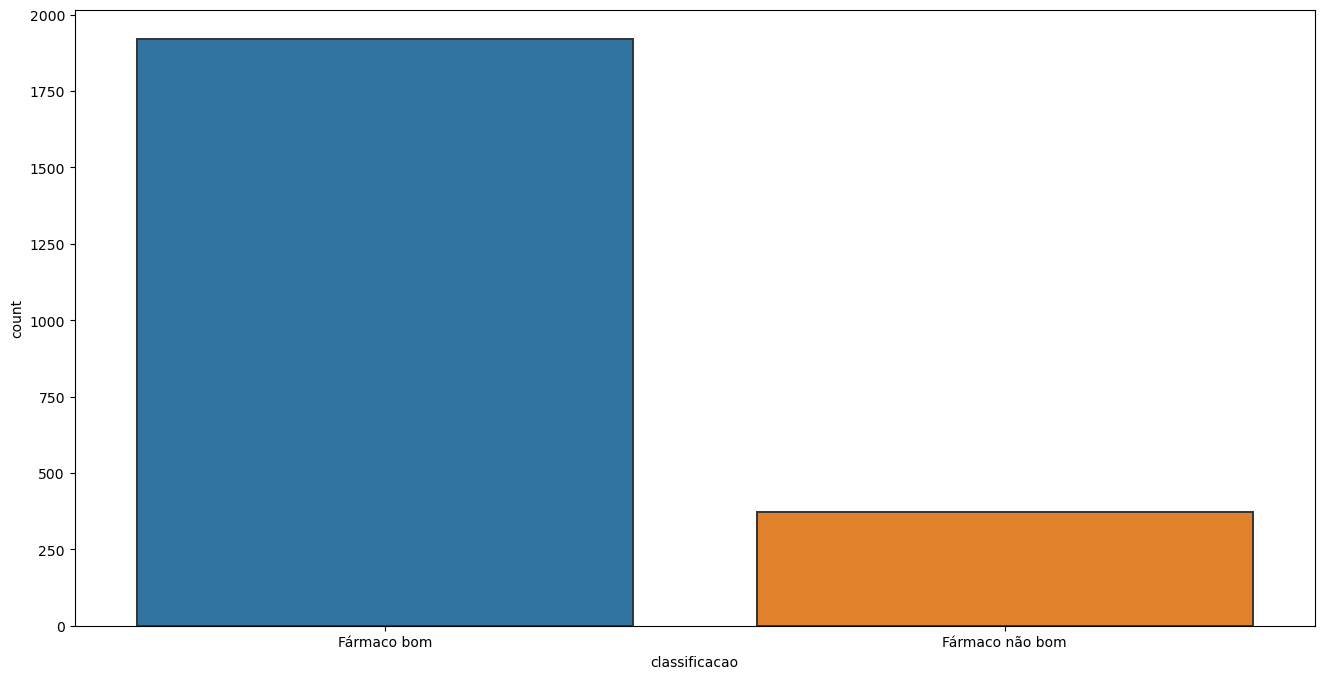

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.countplot(data = df_resultado, x = 'classificacao', 
             linewidth = 1.4, # tamanho da borda de cada barra do gráfico
             edgecolor = '0.2' # cor da borda
            )

# Exibindo o gráfico
plt.show()

<h1 style="text-align: left;"><strong>5. Probabilidade</strong></h1>
<p>&nbsp;</p>
Calculando a probabilidade, com base nos dados, de um fármaco ser bom ou não ser bom.

In [170]:
# Probabilidade de ser 'Fármaco bom' e 'Fármaco não bom'
n = n_classificacao['Fármaco bom'] + n_classificacao['Fármaco não bom']
p = np.around(n_classificacao['Fármaco bom'] / n, 2)
q = np.around(n_classificacao['Fármaco não bom'] / n, 2)

print("Probabilidade de que a molécula seja um 'Fármaco bom': {0}".format(p))
print("Probabilidade de que a molécula seja um 'Fármaco não bom': {0}".format(q))

Probabilidade de que a molécula seja um 'Fármaco bom': 0.84
Probabilidade de que a molécula seja um 'Fármaco não bom': 0.16


<h2 style="text-align: left;"><strong>5.1 Distribuição de probabilidade binomial</strong></h2>
<p>&nbsp;</p>

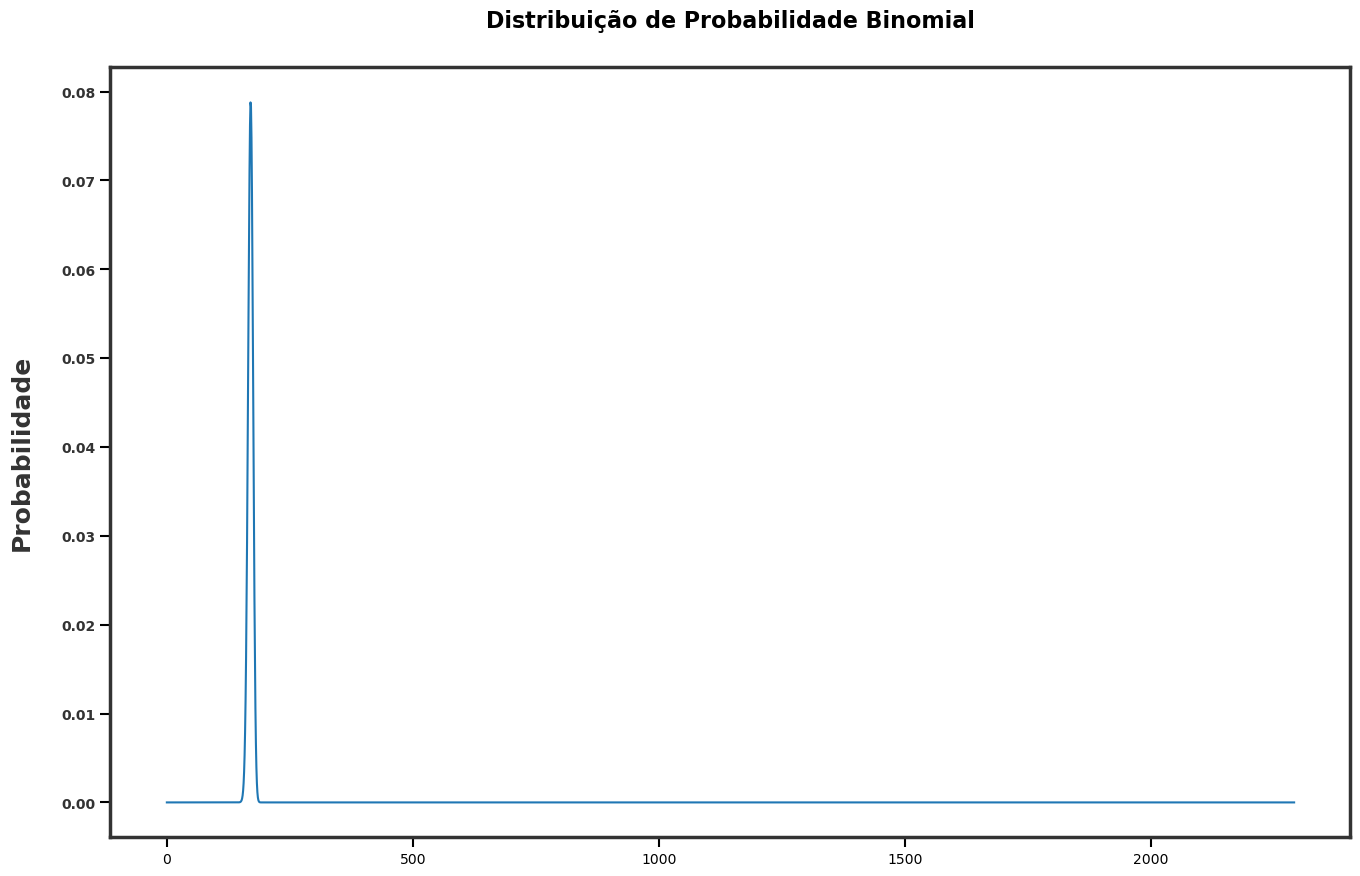

In [250]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

x = np.arange(0,
              2292)

sns.lineplot(x = x, y = binom.pmf(x, n, p))
#ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

# Spines -> as linhas dos eixos
for axis in ['bottom', 'left', 'top', 'right']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')

# Ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Configurando ticks para os valores
# Tick -> linha nos pontos dos eixos
ax.tick_params(which = 'major', length = 7, 
              grid_alpha = 0.5,
              width = 1.5)

# definição geral dos ticks do eixo y
plt.yticks(size = 10, weight = 'bold', color = '0.2')

# Alterando o texto dos eixos
#ax.set_xlabel('Massa Molecular', fontsize = 18, 
#             weight = 'bold', color = '0.2', labelpad = 20)
ax.set_ylabel('Probabilidade', 
             fontsize = 18, weight = 'bold', 
             color = '0.2', labelpad = 20)

# Título do gráfico
ax.set_title("Distribuição de Probabilidade Binomial", 
             fontweight = 'bold', 
             fontsize = 16, pad = 29)

# Salvando gráfico
plt.savefig('histograma_massa_molecular.png', bbox_inches = 'tight', dpi =250, facecolor = ax.get_facecolor())

# Exibindo o gráfico
plt.show()


In [200]:
# Média e variância
media, variancia = binom.stats(total, p)
print("media: {0}".format(media))
print("variancia: {0}".format(variancia))

media: 1375.2
variancia: 550.08
0: 0.00010485760000000006


<h2 style="text-align: left;"><strong>4.4. Histograma 'massa_molecular'</strong></h2>
<p>&nbsp;</p>

In [179]:
df_resultado[df_resultado['massa_molecular'] > 750]

,molecule_chembl_id,canonical_smiles,standard_value,bioatividade,massa_molecular,logp,aceptores_lig_h,doadores_lig_h,classificacao
919,CHEMBL3338677,CCCCCCCCCCCCCCCC(=O)N[C@H](C(=O)N[C@H](C(=O)N[...,30000.0,inativo,1721.165,3.07117,35.0,23.0,Fármaco não bom


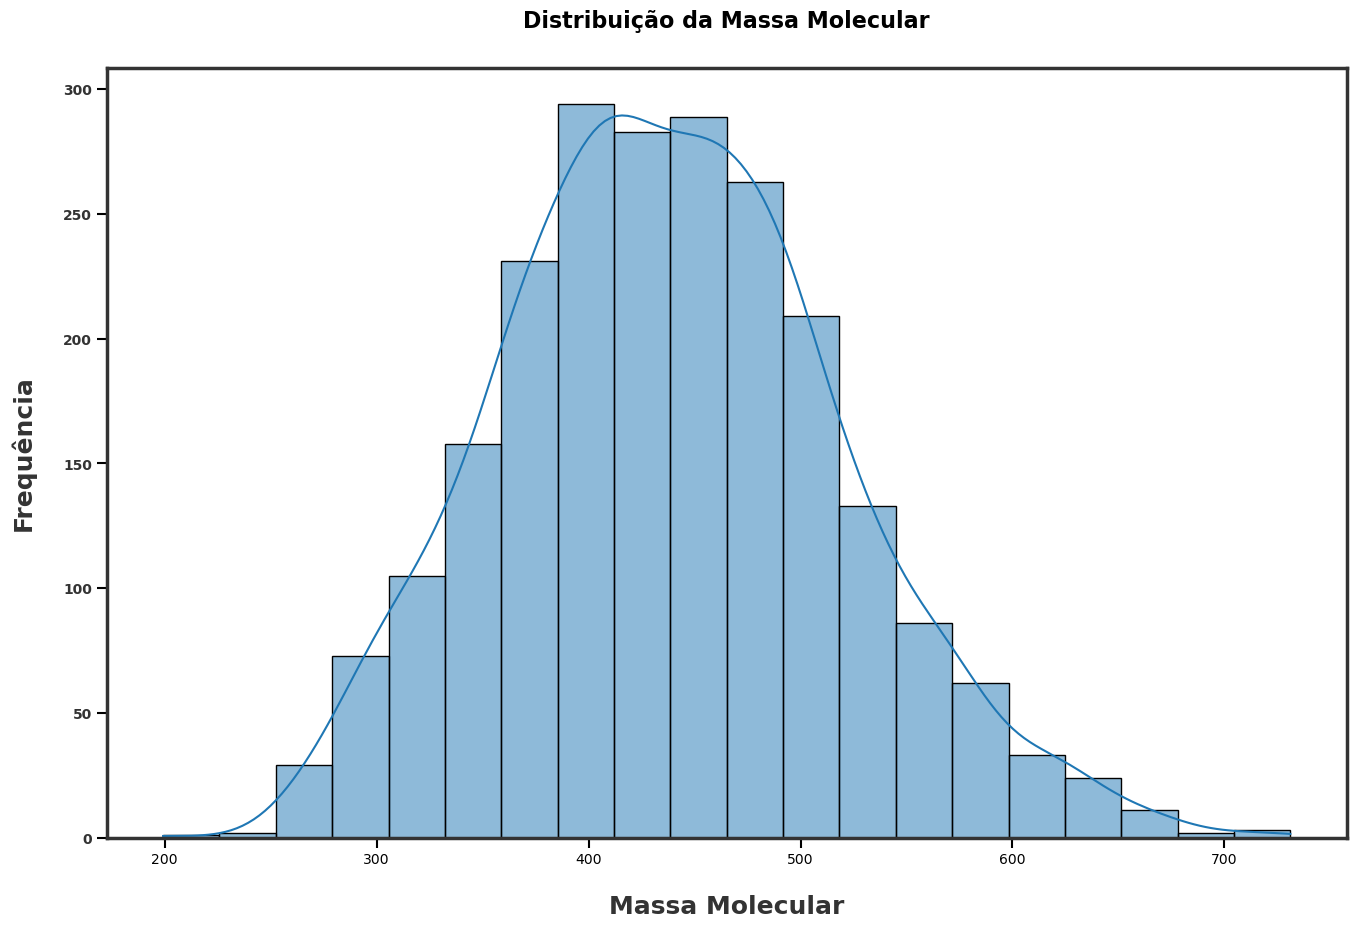

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

# Dados oara o histograma. Utilizando o limite para retirar uma molécula
# que apresentou massa_molecula igual a 1721,165
dados = df_resultado[df_resultado['massa_molecular'] <= 750]

# Histograma
sns.histplot(data = dados, x = 'massa_molecular', 
             linewidth = 1, # tamanho da borda de cada barra do gráfico
             edgecolor = '0', # cor da borda
             kde = True,
             bins = 20)

# Spines -> as linhas dos eixos
for axis in ['bottom', 'left', 'top', 'right']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')

# Ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Configurando ticks para os valores
# Tick -> linha nos pontos dos eixos
ax.tick_params(which = 'major', length = 7, 
              grid_alpha = 0.5,
              width = 1.5)

# definição geral dos ticks do eixo y
plt.yticks(size = 10, weight = 'bold', color = '0.2')

# Alterando o texto dos eixos
ax.set_xlabel('Massa Molecular', fontsize = 18, 
             weight = 'bold', color = '0.2', labelpad = 20)
ax.set_ylabel('Frequência', 
             fontsize = 18, weight = 'bold', 
             color = '0.2', labelpad = 20)

# Título do gráfico
ax.set_title("Distribuição da Massa Molecular", 
             fontweight = 'bold', 
             fontsize = 16, pad = 29)

# Salvando gráfico
plt.savefig('histograma_massa_molecular.png', bbox_inches = 'tight', dpi =250, facecolor = ax.get_facecolor())

# Exibindo o gráfico
plt.show()
